# IS 4487 Assignment 18: Exploring APIs with yfinance

In this assignment, you will:
- Choose an industry you're interested in (such as tech, airlines, or retail)
- Use the `yfinance` Python package as an API to collect historical stock price data
- Clean and prepare the data for analysis
- Explore trends, volatility, and relationships between companies
- Summarize your findings and recommendation in a business memo

## Why This Matters

APIs (Application Programming Interfaces) allow businesses to pull live, real-world data from external sources directly into their analytics tools. Financial analysts, investment firms, and business leaders use APIs like `yfinance` to monitor company performance, assess market trends, and build models based on dynamic data.

This assignment helps you gain hands-on experience with one of the most common API workflows in business analytics: fetching, cleaning, analyzing, and interpreting financial data to support better decision-making.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_14_api.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Step 1: Choose an Industry and Find Company Ticker Symbols

Visit the following website to explore U.S. stock sectors and industries:  
https://www.tradingview.com/markets/stocks-usa/sectorandindustry-sector/

Choose one industry you are interested in (for example: Airlines, Technology, Fast Food, Retail, Energy, etc.).  
Write the names and ticker symbols of 4 public companies in that industry.

**Example:**
- Industry: Technology  
- Tickers: AAPL, MSFT


In [1]:
# Replace this list with your selected tickers
tickers = ['JPM', 'C', 'BAC', 'HSBC']

## Step 2: Use yfinance to Collect Historical Stock Data

Follow the steps below to use the `yfinance` API to collect historical stock price data.

### Instructions

1. Make sure the `yfinance` package is installed by running the code cell below.
2. Import any additional Python libraries that you might need to explore or visualize the data.
3. Use the `yf.download()` function to pull **5 years of daily adjusted close prices** for the companies you selected in Step 1.
    - Choose a start date and an end date that span the past 5 years (e.g., `"2020-01-01"` to `"2025-12-31"`).
    - Only select the **'High'** column, which represents the daily high
4. Preview the first few rows of the dataset using `.head()` to confirm that the data has loaded correctly.



In [2]:
# Import necessary libraries
!pip install yfinance

import yfinance as yf
import pandas as pd

In [3]:
# Download adjusted close prices
df = yf.download(tickers, start="2020-01-01", end="2025-12-31")['High']

/tmp/ipython-input-3450391006.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start="2020-01-01", end="2025-12-31")['High']
[*********************100%***********************]  4 of 4 completed


In [4]:
df.head()

Ticker,BAC,C,HSBC,JPM
Date,,,,
2020-01-02,30.777735,65.335102,28.304079,119.581870
2020-01-03,30.337558,64.740126,27.987751,118.754544
2020-01-06,30.121793,63.960233,27.786447,117.935713
2020-01-07,30.139053,63.759217,27.599529,117.585984
2020-01-08,30.372082,64.322021,27.592343,117.347187


## Step 3: Clean the Data

The data you pulled may contain missing values. Follow these steps:

1. Check the dataset for missing values using `.isnull().sum()`.
2. Fill any missing values using a forward fill method.
3. Recheck for missing values to confirm they have been handled.



In [6]:
df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [5]:
df.isnull().sum()

,0
Ticker,
BAC,0
C,0
HSBC,0
JPM,0


## Step 4: Calculate Daily Returns

To better understand price movement, calculate the daily percentage change for each stock.

1. Use the `.pct_change()` method to calculate daily returns.
2. Drop any rows with missing values that may result from this calculation.
3. Preview the returns DataFrame to confirm it's correct.


In [7]:
returns_df = df.pct_change()
returns_df.dropna(inplace=True)
display(returns_df.head())

Ticker,BAC,C,HSBC,JPM
Date,,,,
2020-01-03,-0.014302,-0.009107,-0.011176,-0.006918
2020-01-06,-0.007112,-0.012047,-0.007193,-0.006895
2020-01-07,0.000573,-0.003143,-0.006727,-0.002965
2020-01-08,0.007732,0.008827,-0.000260,-0.002031
2020-01-09,0.003979,0.012250,0.003648,0.004725


## Step 5: Explore the Data Visually and Statistically

In this step, you will create visualizations and metrics to help understand stock behavior. Don’t interpret or explain anything here — just create the outputs so you can use them in your reflection later.

1. Create a line chart showing stock prices over the 5-year period.
2. Calculate the standard deviation of daily returns for each stock (volatility).
3. Create a correlation matrix of the daily returns between companies.




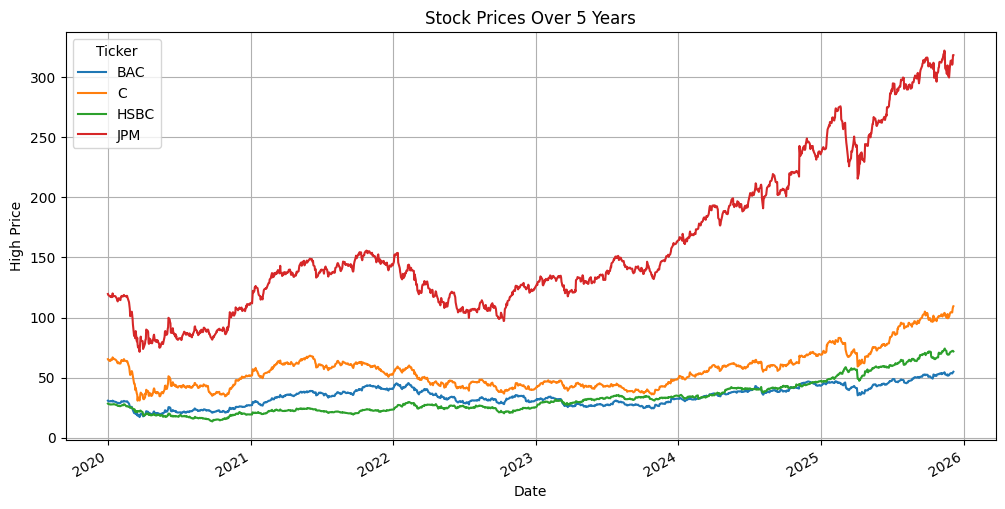

In [8]:
import matplotlib.pyplot as plt

# 1. Create a line chart showing stock prices over the 5-year period.
plt.figure(figsize=(12, 6))
df.plot(ax=plt.gca())
plt.title('Stock Prices Over 5 Years')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.grid(True)
plt.legend(title='Ticker')
plt.show()

In [11]:
# 2. Calculate the standard deviation of daily returns for each stock (volatility).
volatility = returns_df.std()
print('Daily Volatility (Standard Deviation of Returns):')
print(volatility)

Daily Volatility (Standard Deviation of Returns):
Ticker
BAC     0.019066
C       0.021246
HSBC    0.017416
JPM     0.017279
dtype: float64


In [12]:
# 3. Create a correlation matrix of the daily returns between companies.
correlation_matrix = returns_df.corr()
print('\nCorrelation Matrix of Daily Returns:')
print(correlation_matrix)


Correlation Matrix of Daily Returns:
Ticker       BAC         C      HSBC       JPM
Ticker                                        
BAC     1.000000  0.839522  0.573833  0.856319
C       0.839522  1.000000  0.552137  0.815025
HSBC    0.573833  0.552137  1.000000  0.571806
JPM     0.856319  0.815025  0.571806  1.000000


## Step 6: Write a Stakeholder Recommendation Memo

Now that you’ve completed your analysis, it’s time to turn your work into a clear, professional memo for a business audience.

### Scenario

You’ve been asked by a stakeholder (an investor, executive, or client) to evaluate whether it's a good time to invest in a particular industry. They’ve asked you to use recent stock performance data from several leading companies in that industry to help guide their decision.

### Your Task

Use the results from your code in Steps 2–5 to write a **multi-paragraph business memo** that:

1. **Introduces the industry you analyzed** and names the companies you included.
2. **Summarizes major trends** you observed in the stock prices over the last 5 years.
3. **Discusses key metrics**, such as volatility and correlations between companies.
4. **Presents your investment recommendation** — based on your evidence — and explains why you would or wouldn’t advise investing in this industry now.
5. **Suggests future analytics or data sources** that could strengthen or update your recommendation going forward.

This final section should show that you understand how real-world decisions evolve. Think about:
- What **additional data** might help (e.g., earnings reports, economic indicators, sentiment analysis)?
- What **types of models** could be applied (e.g., forecasting, classification, risk modeling)?
- How often should the analysis be updated?

### Format & Expectations

- Write **2–4 paragraphs** in business memo format (not bullet points).
- Use **specific, data-driven evidence** from your own analysis.
- Keep your writing professional and clear — imagine your reader is a client or executive, not a data analyst.
- Your memo should be written **entirely in your own words**. Do not copy from examples, online sources, or AI tools. Your writing should reflect your understanding and your interpretation of the results.
- You do not need to include charts in the memo — the code cells above already display them.



### Add memo here:
I analyzed the major banks industry, the banks include JP Morgan & Chase, Bank of America, HSBC, and Citigroup. JPM definetly has the most volatility as when these banks all go up, JPM goes up a lot more and when they all go down, JPM also goes down the most. These banks are all correlated with one another, following eachother in times up stock prices going up and down.

Citi bank has the greatest volatility, followed by BAC. BAC and JPM are highly correlated with one another. HSBC is the least correlated with BAC, JPM, and Citigroup. Citi group, BAC, and JPM are all highly correlated with one another. I would advice investing in other industries because I think other industries such as AI are hotter at the moment but it may be smart to diversify and invest some into the major banks industry. JPM stock has grown very well throughout the last 5 years and other banks such as HSBS, Citigroup, and BAC has shown growth within the last year. Future analytics to strengthen my decision can include a certain stock against the benchmark in the industry. Stocks that perform the best in a bull market momentum seem the best to get into at this time. Looking into earning reports also help to make sure that a certain stock is not sitting at a bubble and that a certain company is paying expected dividends to shareholders. I would say risk modeling and forecastig are the most important in deciding whether to invest in a stock at a given time. Reading the graphs and looking into macro and micro views, gives a good perspective into forecasting the future of the stock price. In conclusion, I think JPM is the best stock to ivest in as it grows higher than the others in a bull market.

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [13]:
!jupyter nbconvert --to html "assignment_14_MillerAaron.ipynb"

[NbConvertApp] Converting notebook assignment_14_MillerAaron.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 429421 bytes to assignment_14_MillerAaron.html
